In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

In [3]:
temp = pd.read_csv('IMDB Dataset.csv')

In [4]:
temp.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
check = temp[temp['sentiment'].isnull()]
check.head()

,review,sentiment


In [8]:
check = temp[temp['review'].notnull()]
check.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [12]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<AxesSubplot:>

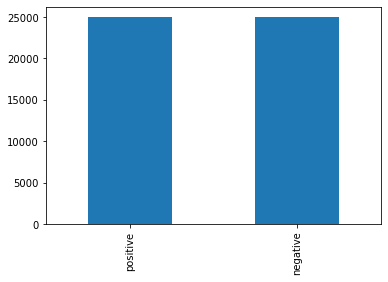

In [13]:
check['sentiment'].value_counts().plot.bar()

In [15]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [16]:
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ',sentence).strip()
    return sentence

In [17]:
check['review'] = check['review'].apply(cleanup)

In [18]:
check.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive


In [21]:
check['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically there s a family where a little boy ...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i m going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [22]:
temp['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [23]:
check.tail()

,review,sentiment
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i m going to have to disagree with the previou...,negative
49999,no one expects the star trek movies to be high...,negative


In [24]:
check['sentiment'] = check['sentiment'].replace(['positive','negative'] , ['pos','neg'])

In [26]:
check.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,pos
1,a wonderful little production br br the filmin...,pos
2,i thought this was a wonderful way to spend ti...,pos
3,basically there s a family where a little boy ...,neg
4,petter mattei s love in the time of money is a...,pos


In [38]:
split = check[['review','sentiment']]
trainData = split.sample(frac=0.8,random_state=200)
testData = split.drop(trainData.index)

In [40]:
trainData

,review,sentiment
20518,shame represents a high point in the career of...,pos
20570,rosalind russell executes a power house perfor...,pos
38530,i give this movie stars purely because of its ...,neg
39945,this show lasted for most of the s and had its...,neg
1713,jessica a ghost story is as the name implies a...,neg
...,...,...
3602,oh dear just what we need another essex cockne...,neg
14269,the story of a little girl who was driven once...,pos
49185,i watched this series after i had seen the nak...,pos
1676,after two long long opening skits one of which...,neg


In [29]:
test

,review,sentiment
2,i thought this was a wonderful way to spend ti...,pos
3,basically there s a family where a little boy ...,neg
4,petter mattei s love in the time of money is a...,pos
5,probably my all time favorite movie a story of...,pos
17,this movie made it into one of my top most awf...,neg
...,...,...
49986,this movie is a disgrace to the major league f...,neg
49989,i got this one a few weeks ago and love it it ...,pos
49992,john garfield plays a marine who is blinded by...,pos
49993,robert colomb has two full time jobs he s know...,neg


In [34]:
!pip install wordcloud

In [35]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [43]:
stopwords = set(STOPWORDS)
stopwords.remove('not')

In [44]:
count_vect = CountVectorizer(min_df = 2 , stop_words = stopwords, ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(trainData["review"])
train_vectors = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(testData["review"])
test_vectors = tfidf_transformer.transform(X_new_counts)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [45]:
from sklearn import svm
from sklearn.metrics import classification_report

classifier_linear = svm.SVC(kernel='linear',probability=True)

classifier_linear.fit(train_vectors, trainData['sentiment'])

prediction_linear = classifier_linear.predict(test_vectors)

In [46]:
print(classification_report(testData['sentiment'], prediction_linear))


              precision    recall  f1-score   support

         neg       0.91      0.90      0.91      5024
         pos       0.90      0.91      0.91      4976

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [48]:
S = classifier_linear.predict_proba(test_vectors)[:,1]

SS = classifier_linear.score(test_vectors, testData['sentiment'])

print("Support Vector Machines Accuracy : %f " % (SS))


Support Vector Machines Accuracy : 0.909400 


In [49]:
from sklearn.naive_bayes import MultinomialNB

model1 = MultinomialNB().fit(train_vectors , trainData["sentiment"])

prediction_M = model1.predict(test_vectors)

print(classification_report(testData['sentiment'], prediction_M))


              precision    recall  f1-score   support

         neg       0.89      0.89      0.89      5024
         pos       0.89      0.89      0.89      4976

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [50]:
l = model1.predict_proba(test_vectors)[:,1]

ls = model1.score(test_vectors, testData['sentiment']) 

print("Multinomial Accuracy : %f" %(ls))

Multinomial Accuracy : 0.890000


In [51]:
from sklearn.naive_bayes import BernoulliNB

model2 = BernoulliNB()

model2.fit(train_vectors , trainData["sentiment"])

prediction_B = model1.predict(test_vectors)

print(classification_report(testData['sentiment'], prediction_B))


              precision    recall  f1-score   support

         neg       0.89      0.89      0.89      5024
         pos       0.89      0.89      0.89      4976

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [52]:
B = model2.predict_proba(test_vectors)[:,1]

BS= model2.score(test_vectors, testData['sentiment'])

print("Bernoulli Accuracy : %f" %(BS))


Bernoulli Accuracy : 0.885700


In [53]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)

logreg.fit(train_vectors , trainData["sentiment"])

prediction_L = logreg.predict(test_vectors)

print(classification_report(testData['sentiment'], prediction_L))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         neg       0.91      0.91      0.91      5024
         pos       0.91      0.91      0.91      4976

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [54]:
M = logreg.predict_proba(test_vectors)[:,1]

LG = logreg.score(test_vectors, testData['sentiment'])

print("Logistic Regression Accuracy : %f " %(LG))



Logistic Regression Accuracy : 0.910300 


In [55]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

RFC.fit(train_vectors , trainData["sentiment"])

prediction_RFC = logreg.predict(test_vectors)

print(classification_report(testData['sentiment'], prediction_RFC))


              precision    recall  f1-score   support

         neg       0.91      0.91      0.91      5024
         pos       0.91      0.91      0.91      4976

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [56]:

R = RFC.predict_proba(test_vectors)[:,1]

SC = RFC.score(test_vectors, testData['sentiment'])

print("Random Forest Accuracy : %f " % (SC))


Random Forest Accuracy : 0.865400 


In [59]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    #print("sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))
    if result.upper()=="POS":
        return "Positive";
    else:
        return "Negative";

In [60]:
test_sample(logreg, "The product was good and easy to use")


'Positive'

In [61]:
test_sample(logreg, "Worst Movie")

'Negative'